In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('hatespeech.csv', sep="\t")
df

,Unnamed: 0,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,True,False,False,False,True,False
3,3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,135551,37080,8590,2,1.0,1.0,0.0,0.0,2.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135552,135552,22986,8303,2,2.0,0.0,0.0,0.0,2.0,0.0,...,False,False,False,False,False,True,True,False,False,False
135553,135553,21008,6207,2,1.0,1.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135554,135554,22986,7886,2,2.0,0.0,0.0,0.0,2.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [3]:
data = df[['sentiment', 'insult','humiliate', 'dehumanize','violence', 'genocide','hate_speech_score', 'text', 'target_race', 'target_religion', 'target_gender', 'target_disability']]
data


,sentiment,insult,humiliate,dehumanize,violence,genocide,hate_speech_score,text,target_race,target_religion,target_gender,target_disability
0,0.0,0.0,0.0,0.0,0.0,0.0,-3.90,Yes indeed. She sort of reminds me of the elde...,True,False,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,-6.52,The trans women reading this tweet right now i...,False,False,True,False
2,4.0,4.0,4.0,4.0,0.0,0.0,0.36,Question: These 4 broads who criticize America...,False,False,False,False
3,2.0,2.0,1.0,0.0,0.0,0.0,0.26,It is about time for all illegals to go back t...,False,False,False,False
4,4.0,4.0,4.0,4.0,4.0,1.0,1.54,For starters bend over the one in pink and kic...,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
135551,1.0,0.0,0.0,0.0,0.0,0.0,-4.88,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,False,True,False,False
135552,2.0,0.0,0.0,0.0,0.0,0.0,-4.40,Millions of #Yemen-is participated in mass ral...,True,True,False,False
135553,1.0,1.0,1.0,0.0,0.0,0.0,-2.49,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,False,True,False,False
135554,2.0,0.0,0.0,0.0,0.0,0.0,-4.40,Millions of #Yemen-is participated in mass ral...,False,True,False,False


In [4]:
condition1 = data['hate_speech_score'] < 0
condition2 = (data['hate_speech_score'] > 0) & (data['hate_speech_score'] < 1)
condition3 = data['hate_speech_score'] >= 1

data.loc[condition3, 'hate_speech_score'] = 1
data.loc[condition1, 'hate_speech_score'] = 0
data.loc[condition2, 'hate_speech_score'] = 2

data

,sentiment,insult,humiliate,dehumanize,violence,genocide,hate_speech_score,text,target_race,target_religion,target_gender,target_disability
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes indeed. She sort of reminds me of the elde...,True,False,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The trans women reading this tweet right now i...,False,False,True,False
2,4.0,4.0,4.0,4.0,0.0,0.0,2.0,Question: These 4 broads who criticize America...,False,False,False,False
3,2.0,2.0,1.0,0.0,0.0,0.0,2.0,It is about time for all illegals to go back t...,False,False,False,False
4,4.0,4.0,4.0,4.0,4.0,1.0,1.0,For starters bend over the one in pink and kic...,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
135551,1.0,0.0,0.0,0.0,0.0,0.0,0.0,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,False,True,False,False
135552,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Millions of #Yemen-is participated in mass ral...,True,True,False,False
135553,1.0,1.0,1.0,0.0,0.0,0.0,0.0,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,False,True,False,False
135554,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Millions of #Yemen-is participated in mass ral...,False,True,False,False


In [5]:
condition = data['sentiment'] > 0
data.loc[condition, 'sentiment'] = 1
data.loc[~condition, 'sentiment'] = 0

condition = data['insult'] > 0
data.loc[condition, 'insult'] = 1
data.loc[~condition, 'insult'] = 0

condition = data['humiliate'] > 0
data.loc[condition, 'humiliate'] = 1
data.loc[~condition, 'humiliate'] = 0

condition = data['dehumanize'] > 0
data.loc[condition, 'dehumanize'] = 1
data.loc[~condition, 'dehumanize'] = 0

condition = data['violence'] > 0
data.loc[condition, 'violence'] = 1
data.loc[~condition, 'violence'] = 0

condition = data['genocide'] > 0
data.loc[condition, 'genocide'] = 1
data.loc[~condition, 'genocide'] = 0

In [6]:
import numpy as np

categorical_values = ["target_race", "target_religion", "target_gender", 'target_disability']

# Make a copy of the DataFrame
data_copy = data.copy()

for val in categorical_values:
    data_copy.loc[:, val] = data_copy[val].astype('category')

cat_columns = data_copy.select_dtypes(['category']).columns
for col in cat_columns:
    data_copy[col] = data_copy[col].cat.codes
    
data_copy.replace(-1, np.NaN, inplace=True) # NaNs were labeled as -1

data_copy.head(5)


,sentiment,insult,humiliate,dehumanize,violence,genocide,hate_speech_score,text,target_race,target_religion,target_gender,target_disability
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes indeed. She sort of reminds me of the elde...,1,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The trans women reading this tweet right now i...,0,0,1,0
2,1.0,1.0,1.0,1.0,0.0,0.0,2.0,Question: These 4 broads who criticize America...,0,0,0,0
3,1.0,1.0,1.0,0.0,0.0,0.0,2.0,It is about time for all illegals to go back t...,0,0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,For starters bend over the one in pink and kic...,0,0,1,0


In [7]:
data_copy.to_csv('dataset.csv')

In [8]:
data = pd.read_csv('dataset.csv', sep=",")


In [9]:
#Downcasing
data['text'] = data['text'].str.lower()
data

,Unnamed: 0,sentiment,insult,humiliate,dehumanize,violence,genocide,hate_speech_score,text,target_race,target_religion,target_gender,target_disability
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes indeed. she sort of reminds me of the elde...,1,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,the trans women reading this tweet right now i...,0,0,1,0
2,2,1.0,1.0,1.0,1.0,0.0,0.0,2.0,question: these 4 broads who criticize america...,0,0,0,0
3,3,1.0,1.0,1.0,0.0,0.0,0.0,2.0,it is about time for all illegals to go back t...,0,0,0,0
4,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,for starters bend over the one in pink and kic...,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,135551,1.0,0.0,0.0,0.0,0.0,0.0,0.0,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,0,1,0,0
135552,135552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,millions of #yemen-is participated in mass ral...,1,1,0,0
135553,135553,1.0,1.0,1.0,0.0,0.0,0.0,0.0,@abeshinzo @realdonaldtrump @shinzoabe 独裁者は行きま...,0,1,0,0
135554,135554,1.0,0.0,0.0,0.0,0.0,0.0,0.0,millions of #yemen-is participated in mass ral...,0,1,0,0


In [10]:
#removing punctuation
data['text'] = data['text'].str.replace(r'[^\w\s]+', '', regex=True)
data

,Unnamed: 0,sentiment,insult,humiliate,dehumanize,violence,genocide,hate_speech_score,text,target_race,target_religion,target_gender,target_disability
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes indeed she sort of reminds me of the elder...,1,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,the trans women reading this tweet right now i...,0,0,1,0
2,2,1.0,1.0,1.0,1.0,0.0,0.0,2.0,question these 4 broads who criticize america ...,0,0,0,0
3,3,1.0,1.0,1.0,0.0,0.0,0.0,2.0,it is about time for all illegals to go back t...,0,0,0,0
4,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,for starters bend over the one in pink and kic...,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,135551,1.0,0.0,0.0,0.0,0.0,0.0,0.0,عاجل سماحة السيد_عبدالملك_بدرالدين_الحوثي نصر...,0,1,0,0
135552,135552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,millions of yemenis participated in mass ralli...,1,1,0,0
135553,135553,1.0,1.0,1.0,0.0,0.0,0.0,0.0,abeshinzo realdonaldtrump shinzoabe 独裁者は行きますこれ...,0,1,0,0
135554,135554,1.0,0.0,0.0,0.0,0.0,0.0,0.0,millions of yemenis participated in mass ralli...,0,1,0,0


In [11]:
#removing stop words
with open("stopwords-en.txt") as f:
    stopwords = set(f.read().split("\n"))
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stopwords)]))
data

,Unnamed: 0,sentiment,insult,humiliate,dehumanize,violence,genocide,hate_speech_score,text,target_race,target_religion,target_gender,target_disability
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes sort reminds elder lady played movie titan...,1,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,trans women reading tweet right beautiful,0,0,1,0
2,2,1.0,1.0,1.0,1.0,0.0,0.0,2.0,question 4 broads criticize america country di...,0,0,0,0
3,3,1.0,1.0,1.0,0.0,0.0,0.0,2.0,time illegals country origin freeway open prev...,0,0,0,0
4,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,starters bend pink kick ass pussy taste shes b...,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,135551,1.0,0.0,0.0,0.0,0.0,0.0,0.0,عاجل سماحة السيد_عبدالملك_بدرالدين_الحوثي نصره...,0,1,0,0
135552,135552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,millions yemenis participated mass rallies 13s...,1,1,0,0
135553,135553,1.0,1.0,1.0,0.0,0.0,0.0,0.0,abeshinzo realdonaldtrump shinzoabe 独裁者は行きますこれ...,0,1,0,0
135554,135554,1.0,0.0,0.0,0.0,0.0,0.0,0.0,millions yemenis participated mass rallies 13s...,0,1,0,0


In [12]:
!pip install nltk
from nltk.stem.porter import *
#stemming
ps = PorterStemmer()
data['text'] = data['text'].apply(lambda x: ' '.join([ps.stem(word) for word in str(x).split()]))
data

,Unnamed: 0,sentiment,insult,humiliate,dehumanize,violence,genocide,hate_speech_score,text,target_race,target_religion,target_gender,target_disability
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ye sort remind elder ladi play movi titan tell...,1,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tran women read tweet right beauti,0,0,1,0
2,2,1.0,1.0,1.0,1.0,0.0,0.0,2.0,question 4 broad critic america countri did fl...,0,0,0,0
3,3,1.0,1.0,1.0,0.0,0.0,0.0,2.0,time illeg countri origin freeway open prevent...,0,0,0,0
4,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,starter bend pink kick ass pussi tast she beg ...,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,135551,1.0,0.0,0.0,0.0,0.0,0.0,0.0,عاجل سماحة السيد_عبدالملك_بدرالدين_الحوثي نصره...,0,1,0,0
135552,135552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,million yemeni particip mass ralli 13squar var...,1,1,0,0
135553,135553,1.0,1.0,1.0,0.0,0.0,0.0,0.0,abeshinzo realdonaldtrump shinzoab 独裁者は行きますこれは...,0,1,0,0
135554,135554,1.0,0.0,0.0,0.0,0.0,0.0,0.0,million yemeni particip mass ralli 13squar var...,0,1,0,0


In [13]:
#finding null values in all columns of dataset
null_values = data.isnull() 
print(null_values)

        Unnamed: 0  sentiment  insult  humiliate  dehumanize  violence  \
0            False      False   False      False       False     False   
1            False      False   False      False       False     False   
2            False      False   False      False       False     False   
3            False      False   False      False       False     False   
4            False      False   False      False       False     False   
...            ...        ...     ...        ...         ...       ...   
135551       False      False   False      False       False     False   
135552       False      False   False      False       False     False   
135553       False      False   False      False       False     False   
135554       False      False   False      False       False     False   
135555       False      False   False      False       False     False   

        genocide  hate_speech_score   text  target_race  target_religion  \
0          False              False

In [14]:
#Replacing null values of categorical columns with mode
categorical_values = ["sentiment", "insult", "humiliate", "dehumanize", "violence","genocide", "hate_speech_score", "target_race", "target_religion", "target_gender", "target_disability"]
for val in categorical_values:
    data[val].fillna(data[val].mode()[0], inplace=True)
data

,Unnamed: 0,sentiment,insult,humiliate,dehumanize,violence,genocide,hate_speech_score,text,target_race,target_religion,target_gender,target_disability
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ye sort remind elder ladi play movi titan tell...,1,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tran women read tweet right beauti,0,0,1,0
2,2,1.0,1.0,1.0,1.0,0.0,0.0,2.0,question 4 broad critic america countri did fl...,0,0,0,0
3,3,1.0,1.0,1.0,0.0,0.0,0.0,2.0,time illeg countri origin freeway open prevent...,0,0,0,0
4,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,starter bend pink kick ass pussi tast she beg ...,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,135551,1.0,0.0,0.0,0.0,0.0,0.0,0.0,عاجل سماحة السيد_عبدالملك_بدرالدين_الحوثي نصره...,0,1,0,0
135552,135552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,million yemeni particip mass ralli 13squar var...,1,1,0,0
135553,135553,1.0,1.0,1.0,0.0,0.0,0.0,0.0,abeshinzo realdonaldtrump shinzoab 独裁者は行きますこれは...,0,1,0,0
135554,135554,1.0,0.0,0.0,0.0,0.0,0.0,0.0,million yemeni particip mass ralli 13squar var...,0,1,0,0


In [15]:
hate = []
nohate = []

for row in range(len(data)):
    if data.iloc[row]["hate_speech_score"] == 1:
        hate.append(data.iloc[row]["text"])
    elif data.iloc[row]["hate_speech_score"] == 0:
        nohate.append(data.iloc[row]["text"])

with open("hate.txt", 'w') as f:
    f.write("\n".join(hate))

with open("nohate.txt", 'w') as f:
    f.write("\n".join(nohate))

In [16]:
import pandas as pd
import numpy as np
from collections import Counter

hate_df = pd.read_csv("hate.txt", header=None)
hate_df.columns = ["hate"]
nohate_df = pd.read_table("nohate.txt", header=None)
nohate_df.columns = ["nohate"]

hate_doc = (" ".join(hate_df["hate"].dropna()))
nohate_doc = (" ".join(nohate_df["nohate"].dropna()))

hate_words = (" ".join(hate_df["hate"].dropna()).split())
nohate_words = (" ".join(nohate_df["nohate"].dropna()).split())
hate_most_common = Counter(hate_words).most_common(10)
no_hate_most_common = Counter(nohate_words).most_common(10)

print("Most common words in hate reviews:")
print(hate_most_common, "\n")

print("Most common words in no hate reviews:")
print(no_hate_most_common)

Most common words in hate reviews:
[('fuck', 20531), ('nigger', 11250), ('hate', 7752), ('kill', 6480), ('bitch', 6208), ('muslim', 5301), ('peopl', 5150), ('like', 4632), ('jew', 4410), ('stupid', 4202)] 

Most common words in no hate reviews:
[('peopl', 14835), ('url', 14788), ('women', 12463), ('like', 9865), ('just', 9702), ('white', 8651), ('im', 8608), ('men', 7793), ('dont', 7498), ('right', 6404)]


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [hate_doc, nohate_doc]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)

(2, 34213)


In [18]:
K = 10 # choose K highest


print("Positive words with highest TF/IDF:")

# get indices of words with highest TF/IDF score 
#(np.flip for descending order of indices)
idx_pos = np.flip(np.argsort(X[0, :].A)[0][-K:])
pos_scores = np.flip(np.sort(X[0, :].A)[0][-K:])
pos_words = vectorizer.get_feature_names_out()[idx_pos]

print(dict(zip(pos_words, pos_scores)))

print("\nNegative words with highest TF/IDF:")

idx_neg = np.flip(np.argsort(X[1, :].A)[0][-K:])
neg_scores = np.flip(np.sort(X[1, :].A)[0][-K:])
neg_words = vectorizer.get_feature_names_out()[idx_neg]

print(dict(zip(neg_words, neg_scores)))

Positive words with highest TF/IDF:
{'fuck': 0.5614909876176706, 'nigger': 0.3076700409477762, 'hate': 0.21200516954908102, 'kill': 0.1772179435859191, 'bitch': 0.169779165707004, 'muslim': 0.14497412329459217, 'peopl': 0.1408445076338709, 'like': 0.12667801152623107, 'jew': 0.12060665605152829, 'stupid': 0.11491817885000495}

Negative words with highest TF/IDF:
{'peopl': 0.3145819337137267, 'url': 0.31358528046906575, 'women': 0.26428275294062525, 'like': 0.20919115443787759, 'just': 0.20573467616384067, 'white': 0.18344781318216716, 'im': 0.1825359814902433, 'men': 0.1652535901200588, 'dont': 0.15899800060569752, 'right': 0.13579930593210016}


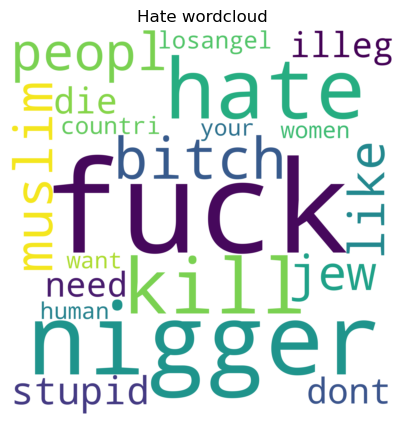

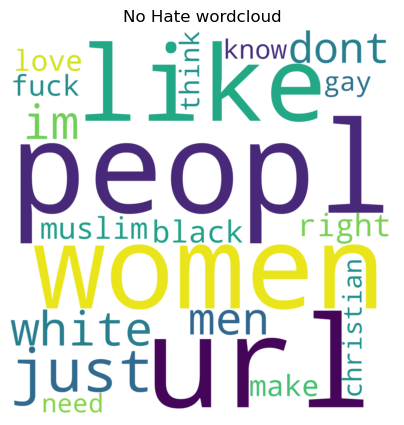

In [19]:

from PIL import Image
from wordcloud import WordCloud
from os import path
import PIL.ImageOps    
import matplotlib.pyplot as plt


K = 20 # choose some more words for the wordclouds
idx_pos = np.flip(np.argsort(X[0, :].A)[0][-K:])
pos_scores = np.flip(np.sort(X[0, :].A)[0][-K:])
pos_words = vectorizer.get_feature_names_out()[idx_pos]

idx_neg = np.flip(np.argsort(X[1, :].A)[0][-K:])
neg_scores = np.flip(np.sort(X[1, :].A)[0][-K:])
neg_words = vectorizer.get_feature_names_out()[idx_neg]

wordcloud = WordCloud(background_color="white", width=1000, height=1000, scale=4)
wordcloud.generate_from_frequencies(dict(zip(pos_words, pos_scores)))

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Hate wordcloud")
plt.axis("off")

plt.show()

wordcloud = WordCloud(background_color="white", width=1000, height=1000, scale=4)
wordcloud.generate_from_frequencies(dict(zip(neg_words, neg_scores)))

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("No Hate wordcloud")
plt.axis("off")

plt.show()

In [44]:
#even distribution of dataset in each class
class_2 = data[data['hate_speech_score'] == 2]
class_1 = data[data['hate_speech_score'] == 1]
class_0 = data[data['hate_speech_score'] == 0].sample(n=40000)
balanced_df = pd.concat([class_0, class_1,class_1, class_2], axis=0)


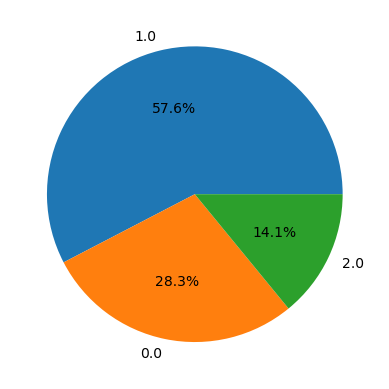

In [45]:
plt.pie(balanced_df['hate_speech_score'].value_counts().values,
        labels=balanced_df['hate_speech_score'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras


In [23]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB


In [46]:
X = balanced_df['text']
y = balanced_df['hate_speech_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_features=30000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [48]:
logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=6000)
logistic_regression_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=6000, multi_class='multinomial', solver='saga')

In [61]:
y_pred = logistic_regression_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')
print(f'Classification Report:\n{classification_rep')

Accuracy: 0.8621263046170176
Confusion Matrix:
[[ 7056   620   377]
 [  458 15437   252]
 [ 1026  1164  1875]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      8053
         1.0       0.90      0.96      0.93     16147
         2.0       0.75      0.46      0.57      4065

    accuracy                           0.86     28265
   macro avg       0.82      0.76      0.78     28265
weighted avg       0.86      0.86      0.85     28265



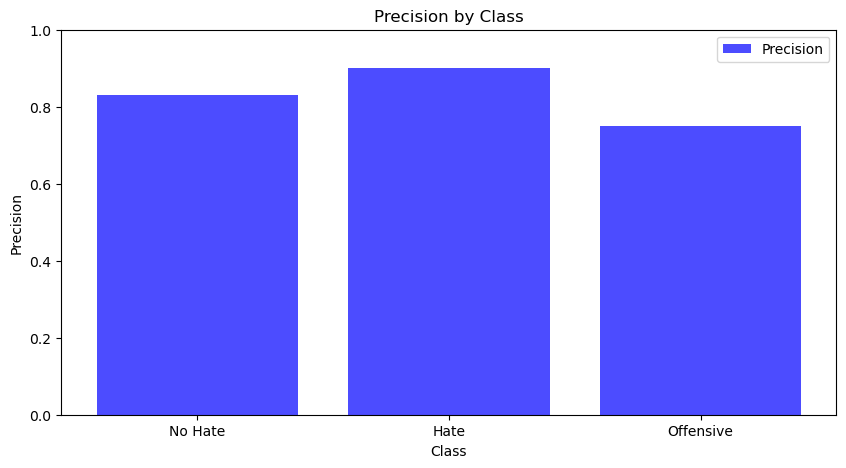

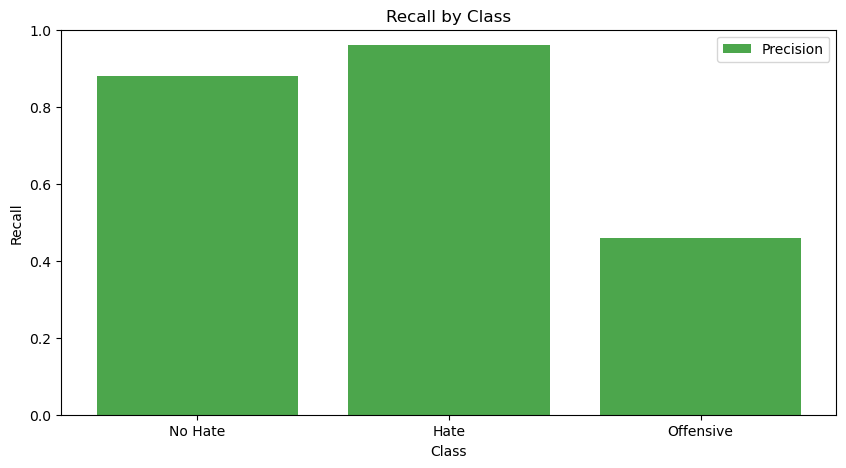

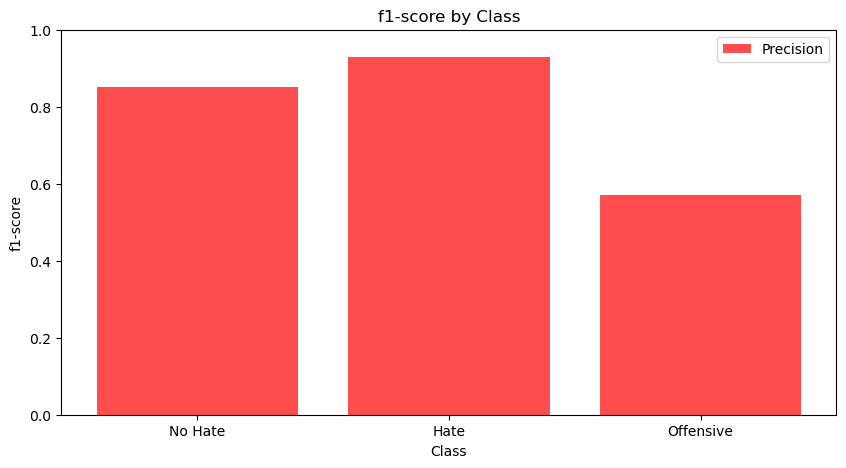

In [68]:
class_names = ['No Hate', 'Hate', 'Offensive']
precision = [0.83, 0.90, 0.75]
recall = [0.88, 0.96, 0.46]
f1_score = [0.85, 0.93, 0.57]

plt.figure(figsize=(10, 5))
plt.bar(class_names, precision, color='blue', alpha=0.7, label='Precision')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision by Class')
plt.ylim(0, 1)
plt.legend(loc='upper right')

plt.figure(figsize=(10, 5))
plt.bar(class_names, recall, color='green', alpha=0.7, label='Precision')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall by Class')
plt.ylim(0, 1)
plt.legend(loc='upper right')

plt.figure(figsize=(10, 5))
plt.bar(class_names, f1_score, color='red', alpha=0.7, label='Precision')
plt.xlabel('Class')
plt.ylabel('f1-score')
plt.title('f1-score by Class')
plt.ylim(0, 1)
plt.legend(loc='upper right')

In [52]:
#Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test_tfidf)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.81
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80      8053
         1.0       0.85      0.92      0.88     16147
         2.0       0.72      0.31      0.44      4065

    accuracy                           0.81     28265
   macro avg       0.78      0.69      0.71     28265
weighted avg       0.80      0.81      0.79     28265



In [60]:
new_text = ["murder him"]
new_text_tfidf = tfidf_vectorizer.transform(new_text)
def result(label):
    if label == 0.0:
        return print("no hate")
    elif label == 1.0:
        return print("hate comment")
    else:
        return print("offensive")

predictions = result(logistic_regression_model.predict(new_text_tfidf))
predictions

hate comment


In [ ]:
import pickle
pickle.dump(logistic_regression_model , open('hatespeech_model.pkl' , 'wb'))

pickle.dump(tfidf_vectorizer , open('tfidf_vectorizer.pkl' , 'wb'))
#Load and test saved model
loaded_model = pickle.load(open('hatespeech_model.pkl', 'rb'))
loaded_vector = pickle.load(open('tfidf_vectorizer.pkl' , 'rb'))


new_text = ["Kill Him!"]
new_text_tfidf = loaded_vector.transform(new_text)

label = loaded_model.predict(new_text_tfidf)
res = ""
if label == 0.0:
    res = "NO HATE"
elif label == 1.0:
    res = "HATE COMMENT"
else:
    res = "OFFENSIVE"

# def result(label):
#     if label == 0.0:
#         return print("nosefsef hate")
#     elif label == 1.0:
#         return print("hate comment")
#     else:
#         return print("offensive")

print(res)